## import libraries

In [1]:
import cv2, os, json, math, pickle
import spiceypy as spice
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from scipy.spatial.transform import Rotation as R
from utils import break_blocks, contrast_resize
from datetime import datetime

### for figure readability

In [2]:
plt.rcParams.update({'font.family': 'Serif'})
plt.rcParams.update({'font.size': 16})

### useful globals

In [3]:
TRAIN_DIR = os.path.expanduser("~/eigenjuno/DATA/TRAIN/")
TEST_DIR = os.path.expanduser("~/eigenjuno/DATA/TEST/")
KERNEL_DIR = os.path.expanduser("~/eigenjuno/STITCHING/KERNELS/CURRENT/")
VEC_SIZE = 256 * 256 * 3
VEC_DIM = (256, 256, 3)
TRAIN_SIZE = 400
TEST_NAME = '6743'
TEST_IMGS = [6743] #, 6745, 6746, 6749, 6750, 6582, 6587, 6978, 6980, 6983, 6984, 6991, 6993, 6994, 10348, 5192]

## read in training/testing data

In [ ]:
tags = np.empty(TRAIN_SIZE)
data = np.empty((TRAIN_SIZE, VEC_SIZE))

for r, d, f in os.walk(TRAIN_DIR + 'ONE/'):
    for file in f:
        num = int(file.split('.')[0])
        tags[num - 1] = 1
        img = mpimg.imread(os.path.join(TRAIN_DIR, 'ONE/' + str(num) + '.png'))
        data[num - 1, :] = img[:, :, :3].reshape(VEC_SIZE)
        
for r, d, f in os.walk(TRAIN_DIR + 'ZERO/'):
    for file in f:
        num = int(file.split('.')[0])
        tags[num - 1] = 0
        img = mpimg.imread(os.path.join(TRAIN_DIR, 'ZERO/' + str(num) + '.png'))
        data[num - 1, :] = img[:, :, :3].reshape(VEC_SIZE)

tags = tags.astype('uint8')

## perform training w/ pca and eigenimaging

In [ ]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, tags, test_size = 0.2)

# perform pca transform
pca = PCA(n_components = 0.9, svd_solver = 'full').fit(X_train)
print('Decomposed test set to', pca.components_.shape[0], 'components')
X_train_PCA = pca.transform(X_train)=

# apply pca transform to x_test
X_test_PCA = pca.transform(X_test)

# fit classifier to data
C_RANGE = np.logspace(-3, 3, 20)
G_RANGE = np.logspace(-9, 1, 20)
param_grid = { 'C': C_RANGE,
               'gamma': ['scale', 'auto'],
               'gamma': G_RANGE,
               'degree': [2, 3, 4],
               'kernel': ['rbf', 'poly'], 
               'coef0': [0, 1],
               'class_weight': ['balanced'] }

svm = GridSearchCV(SVC(), param_grid, n_jobs = -1, verbose = 0)
svm.fit(X_train_PCA, y_train)

Copt = svm.best_params_['C'] # svm cost parameter
Kopt = svm.best_params_['kernel'] # kernel function
Gopt = svm.best_params_['gamma'] # gamma of RBF kernel
Dopt = svm.best_params_['degree'] # degree of polynomial kernel
Zopt = svm.best_params_['coef0'] # independent term in poly kernel

print('\nOptimal SVM parameter values:')
print('C:', Copt)
print('kernel:', Kopt)
print('gamma:', Gopt)
print('degree:', Dopt)
print('coef0:', Zopt, '\n')

# generate report
print('Calculating metrics...')
y_pred = svm.predict(X_test_PCA)
print(classification_report(y_test, y_pred))
scores = cross_val_score(svm, X_test_PCA, y_test, cv = 6)
print('\nAverage cross-validate score: ', scores.mean())

# dump model data for safe-keeping
pickle.dump(svm, open('MODELS/svm_model_' + datetime.now().strftime("%d:%m:%Y_%H:%M:%S") + '.sav', 'wb'))

### save optimal model weights

In [ ]:
pickle.dump(svm, open('MODELS/svm_model_opt.sav', 'wb'))
pickle.dump(pca, open('MODELS/pca_model_opt.sav', 'wb'))

### load optimal model weights

In [ ]:
svm = pickle.load(open('MODELS/svm_model_opt.sav', 'rb'))
pca = pickle.load(open('MODELS/pca_model_opt.sav', 'rb'))

X_train, X_test, y_train, y_test = train_test_split(data, tags, test_size = 0.2)
X_test_PCA = pca.transform(X_test)
y_pred = svm.predict(X_test_PCA)

## divide-(and shift)-and-conquer pipeline

Shifting, dividing, and conquering! Get ready to rumble, test image no. 6743
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 512
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 25

Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 512
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 512
Returning block size 256
Returning block size 256
Returning block size 256


Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 512
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 512
Returning block size 256


Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 512
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 256
Returning block size 512


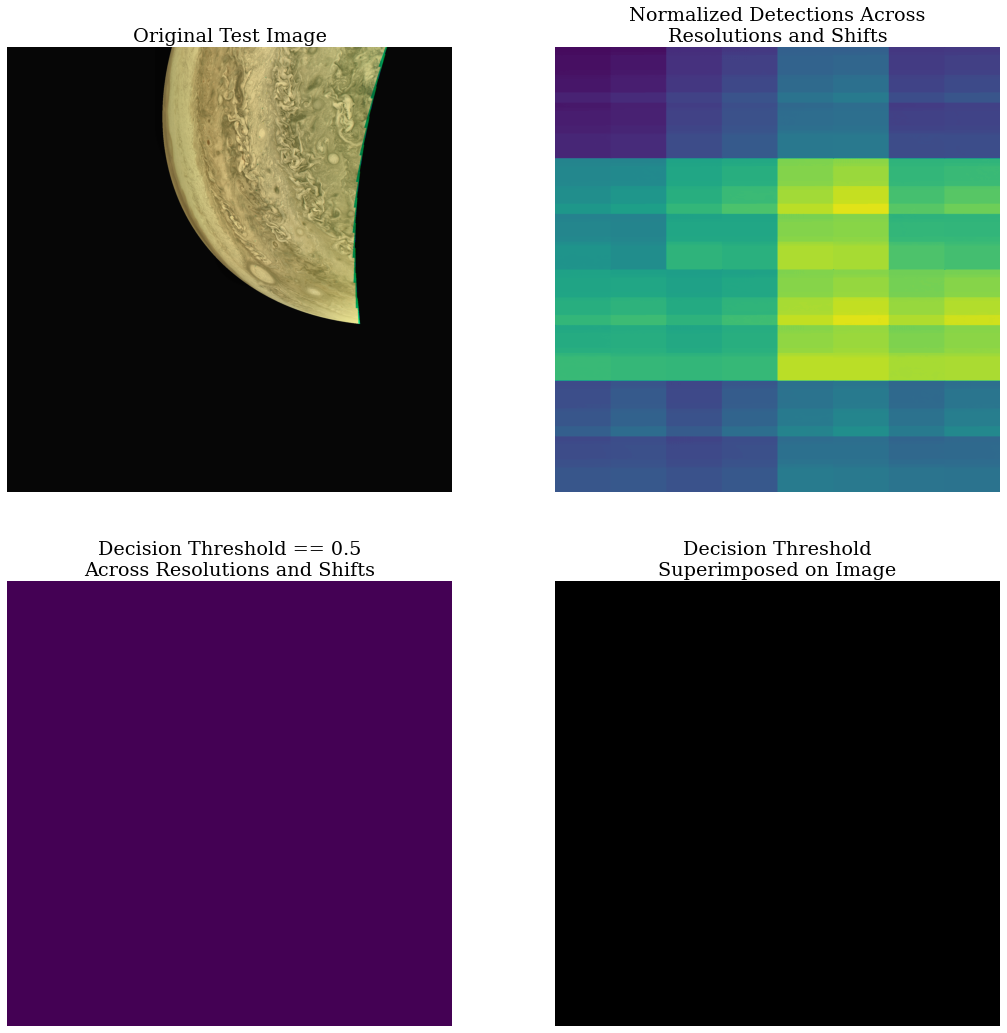

In [4]:
for test_name in TEST_IMGS:
    print('Shifting, dividing, and conquering! Get ready to rumble, test image no.', str(test_name))
    img = plt.imread(os.path.join(TEST_DIR, str(test_name) + '-Contrasted.png'))
    img = img[:, :, :3]
    
    detections = break_blocks(img)
    
    normalize = detections / (np.square(detections)).sum()
    threshold = np.where(normalize == 0.5, 1, 0)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (18, 18));

    ax1.imshow(img);
    ax1.title.set_text('Original Test Image');
    ax1.axis('off');

    ax2.imshow(normalize);
    ax2.title.set_text('Normalized Detections Across\nResolutions and Shifts');
    ax2.axis('off');
 
    ax3.imshow(threshold);
    ax3.title.set_text('Decision Threshold == 0.5\nAcross Resolutions and Shifts');
    ax3.axis('off');

    superimposed = np.copy(img)
    for i in range(3):
        superimposed[:, :, i] = threshold * img[:, :, i]

    ax4.imshow(superimposed);
    ax4.title.set_text('Decision Threshold\nSuperimposed on Image');
    ax4.axis('off');

    fig.savefig('FIGURES/detection_maps_' + str(test_name) + '.png')

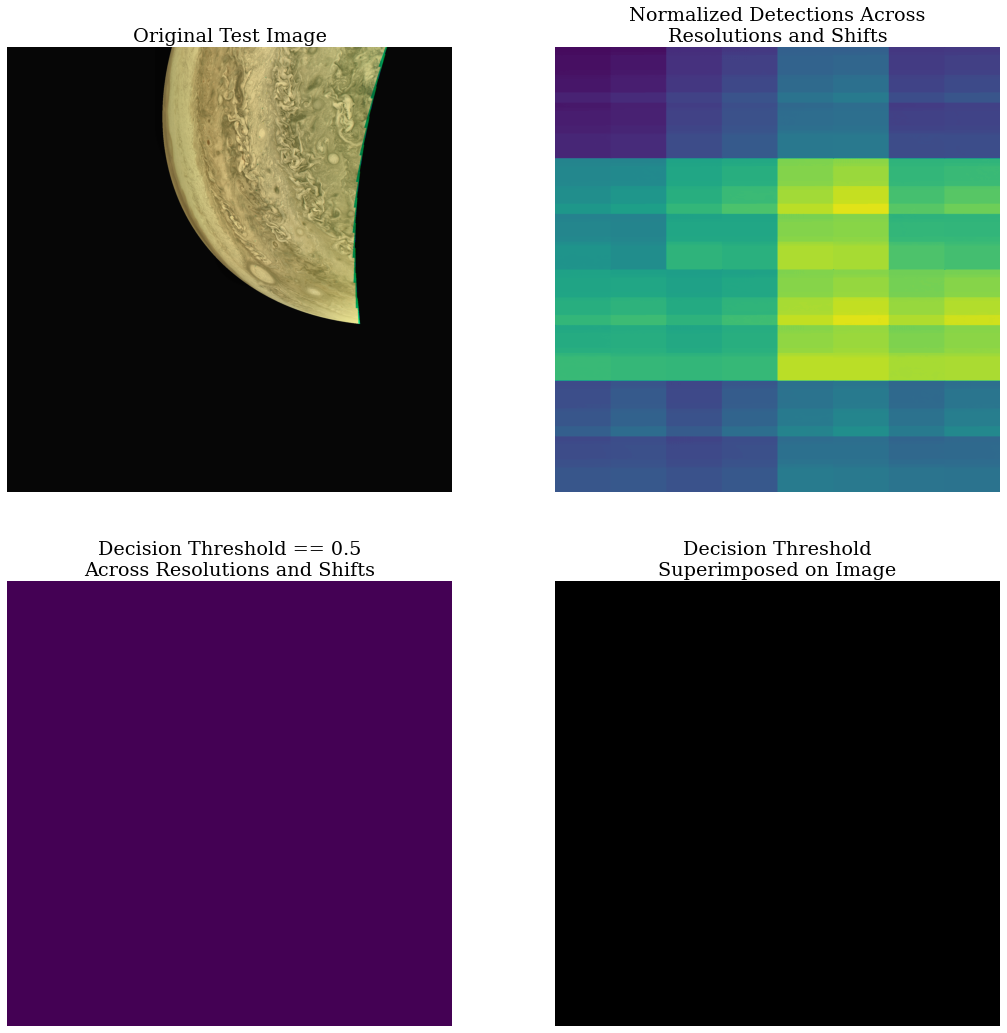

In [6]:
normalize = detections / detections[(np.unravel_index(detections.argmax(), detections.shape))]
threshold = np.where(normalize == 0.5, 1, 0)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (18, 18));

ax1.imshow(img);
ax1.title.set_text('Original Test Image');
ax1.axis('off');

ax2.imshow(normalize);
ax2.title.set_text('Normalized Detections Across\nResolutions and Shifts');
ax2.axis('off');

ax3.imshow(threshold);
ax3.title.set_text('Decision Threshold == 0.5\nAcross Resolutions and Shifts');
ax3.axis('off');

superimposed = np.copy(img)
for i in range(3):
    superimposed[:, :, i] = threshold * img[:, :, i]

ax4.imshow(superimposed);
ax4.title.set_text('Decision Threshold\nSuperimposed on Image');
ax4.axis('off');

fig.savefig('FIGURES/detection_maps_6743.png')

### contrast and resize new images

In [ ]:
# constrast single new test image
# img = contrast_resize(os.path.join(TEST_DIR, TEST_NAME + '-Stitched.png'), (2048, 2048))
# plt.imsave(os.path.join(TEST_DIR, TEST_NAME + '-Contrasted.png'), img)

# contrast a group of test images
for test_name in TEST_IMGS:
    img = contrast_resize(os.path.join(TEST_DIR, str(test_name) + '-Stitched.png'), (2048, 2048))
#     img = cv2.addWeighted(img, 1.25, np.zeros(img.shape, img.dtype), 0, 0)
    plt.imsave(os.path.join(TEST_DIR, str(test_name) + '-Contrasted.png'), img)

# contrast a new group of training images
# for r, d, f in os.walk(TRAIN_DIR + 'PROCESS/'):
#     for file in f:
#         num = int(file.split('.')[0])
#         img = contrast_resize(os.path.join(TRAIN_DIR, 'PROCESS/' + str(num) + '.png'), (256, 256))
#         plt.imsave(os.path.join(TRAIN_DIR, 'ONE/' + str(num) + '.png'), img)

### display contrasted dataset

In [ ]:
fig, axes = plt.subplots(7, 7, figsize = (15, 20));
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i, :].reshape(VEC_DIM))
    ax.title.set_text('VALUE ' + str(int(tags[i])))
    ax.title.set_fontsize(14)
    ax.axis('off')
fig.savefig('FIGURES/display_dataset.png')

### visualize results w/ images

In [ ]:
fig, axes = plt.subplots(6, 6, figsize = (15, 20));
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i - 1, :].reshape(VEC_DIM))
    ax.title.set_text('VALUE ' + str(int(y_test[i - 1])) + "\n PREDICTED " + str(int(y_pred[i - 1])))
    ax.title.set_fontsize(14)
    ax.axis('off')
plt.savefig('FIGURES/sample_outputs.png')

### pca with uncontrasted data - fewer components

In [ ]:
pca_MIN = PCA(n_components = pca.components_.shape[0]).fit(data)
plt.figure(figsize = (10, 7));
plt.plot(pca_MIN.explained_variance_ratio_.cumsum(), color = 'seagreen');
plt.xlabel('Number of Principal Components');
plt.ylabel('Explained Variance Ratio');
plt.title('Explained Variance Ratio of\nPrincipal Components in a Contrasted Dataset');
plt.savefig('FIGURES/pca_variance.png')

### visualize support vectors

In [ ]:
sv_indices = svm.support_
fig, axes = plt.subplots(5, 4, figsize = (18, 22))
for i, ax in enumerate(axes.flat):
    if i < sv_indices.size:
        ax.imshow(pca.inverse_transform(svm.support_vectors_[i, :]).reshape((VEC_DIM)))
        ax.axis('off')
    else:
        fig.delaxes(ax)
fig.savefig('FIGURES/support_vectors.png')

### visualize eigenfaces

In [ ]:
fig, axes = plt.subplots(5, 4, figsize = (18, 25))
for i, ax in enumerate(axes.flat):
    if i < pca.components_.shape[0]:
        ax.title.set_text(str(pca.singular_values_[i]))
        ax.imshow(pca.components_[i, :].reshape((VEC_DIM)) * 255)
        ax.axis('off')
    else:
        fig.delaxes(ax)
fig.savefig('FIGURES/eigenfaces.png')

### variance of training space parameter vs num support vectors

In [ ]:
# training accuracy vs risk of overfitting
G_RANGE = np.logspace(-9, 1, 20)

NUM_SVS = []

data_PCA = pca.transform(data)

for G in G_RANGE:
    svm = SVC(C = 1, kernel = 'rbf', gamma = G, class_weight = 'balanced')
    svm.fit(data_PCA, tags)
    NUM_SVS.append(svm.support_vectors_.shape[0])
    
plt.figure(figsize = (10, 7));
plt.plot(C_RANGE, NUM_SVS, color = 'lightcoral');
plt.xscale('log');
plt.xlabel('G');
plt.ylabel('Support Vectors');
plt.title('Gamma Value (Variance of Training Space)\nvs. Number of Support Vectors')
plt.savefig('FIGURES/gamma_sv_tradeoff.png')

### gamma vs number of support vectors

In [ ]:
# training accuracy vs risk of overfitting
C_RANGE = np.logspace(-2, 4, 20)

NUM_SVS = []

data_PCA = pca.transform(data)

for C in C_RANGE:
    svm = SVC(C = C, kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')
    svm.fit(data_PCA, tags)
    NUM_SVS.append(svm.support_vectors_.shape[0])
    
plt.figure(figsize = (10, 7));
plt.plot(C_RANGE, NUM_SVS, color = 'darkorchid');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Support Vectors');
plt.title('Cost Value (L2 Regularization Parameter)\nvs. Number of Support Vectors')
plt.savefig('FIGURES/cost_sv_tradeoff.png')

### simple pca example

In [ ]:
fig = plt.figure(figsize = (15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax2 = fig.add_subplot(1, 2, 2)

n = 100

xyz = np.empty((n, 3))

xyz[:, 0] = np.linspace(0, 1, 100)
xyz[:, 1] = np.sin(9 * xyz[:, 0]) + np.sqrt(1 / 3.0) * np.random.randn(n)
xyz[:, 2] = np.random.rand(n)

for i in range(xyz.shape[0]):
    if xyz[i, 1] < 0.5:
        ax1.scatter(xyz[i, 0], xyz[i, 1], xyz[i, 2], marker = '^', color = 'green')
    else:
        ax1.scatter(xyz[i, 0], xyz[i, 1], xyz[i, 2], marker = 'o', color = 'hotpink')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Data before PCA (3D)')

for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax1.get_zticklabels()):
    label.set_fontsize(12)

pca_xyz = PCA(n_components = 2).fit(xyz)
xyz_d = pca_xyz.transform(xyz)

for i in range(xyz.shape[0]):
    if xyz[i, 1] < 0.5:
        ax2.scatter(xyz_d[i, 0], xyz_d[i, 1], marker = '^', color = 'green')
    else:
        ax2.scatter(xyz_d[i, 0], xyz_d[i, 1], marker = 'o', color = 'hotpink')

ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_title('Data after PCA (2D)')

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)

fig.savefig('FIGURES/pca_example.png')

## finding coordinates with spice

In [ ]:
# load the kernels
KERNELS = []
for r, d, f in os.walk(KERNEL_DIR):
    for file in f:
        KERNELS.append(file)

spice.kclear()
for k in KERNELS:
    spice.furnsh(os.path.join(KERNEL_DIR, k))

# read image metadata
with open(os.path.join(TEST_DIR, TEST_NAME + '-Metadata.json'), 'r') as f:
    img_json = json.load(f)
    image = img_json['FILE_NAME']
    image_time = img_json['START_TIME']
et = spice.str2et(image_time)

### find lat/long of camera location of jupiter

In [ ]:
# get position of juno relative to jupiter at elapsed time
pos, orient = spice.spkpos('JUNO', et, 'IAU_JUPITER', 'NONE', 'JUPITER')

# rotation matrix from juno spacecraft to 'cube' modeling camera - from juno_v12.tf
JUNO_TO_CUBE = np.matrix([[-0.0059163, -0.0142817, -0.9998805], 
                          [ 0.0023828, -0.9998954,  0.0142678], 
                          [-0.9999797, -0.0022981,  0.0059497]])

# rotation matrix from 'cube' to camera (pretty sure is just an aberration correction) - from juno_v12.tf
CUBE_TO_CAM = (R.from_euler('zyx', [0.69, -0.469,  0.583])).as_matrix()

# combine rotation matrices - application order JUNO_TO_CUBE then CUBE_TO_CAM
rot_matrix = CUBE_TO_CAM * JUNO_TO_CUBE

# apply rotations to juno position to get position camera points to
pos = rot_matrix * pos.reshape(-1, 1)

# calculate planetocentric lat/long coordinates in radians
_, long, lat = spice.reclat(np.ravel(pos))

# convert coordinates to degrees
long, lat = np.array([long, lat]) * 180 / math.pi

print(long, lat)

### convert surface raster to lat/long

In [ ]:
raster = np.load(os.path.join(TEST_DIR, TEST_NAME + '-Raster.npy'))
coords = np.empty((2048, 2048, 2))
for i in range(2048):
    for j in range(2048):
        if abs(np.mean(raster[i, j, :])) != 0:
            _, long, lat = spice.reclat(raster[i, j, :])
            coords[i, j, :] = np.array([long, lat]) * 180 / math.pi
        else:
            coords[i, j, :] = np.array([np.nan, np.nan]) # outside range
np.save(os.path.join(TEST_DIR, TEST_NAME + '-Coords', coords))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax1.axis('off')
ax2.imshow(raster)
ax2.axis('off')

# save detections in log file w/ coordinates, perijove, and feature id
det_indices = np.argwhere(threshold == 1)
det_coords = np.empty((det_indices.shape[0], 2))
for i in range(det_indices.shape[0]):
    det_coords[i, :] = coords[det_indices[i, 0], det_indices[i, 1]]
np.save('LOGS/' + TEST_NAME + '_' + image_time, det_coords)

## retrain model with new data

In [ ]:
# detections should be certified to be correct by human user
fig, axes = plt.subplots(6, 6, figsize = (18, 20))
green_indices = []
for i, ax in enumerate(axes.flat):
    block = retrain_blocks[i, :].reshape((VEC_DIM)) * 255
    if len(np.where((block[:, :, 0] == 0) & (block[:, :, 1] != 0) & (block[:, :, 2] != 0))[0]) == 0:
        ax.imshow(block / 255)
        ax.axis('off')
    else:
        fig.delaxes(ax)
        green_indices.append(i)
retrain_blocks = np.delete(retrain_blocks, green_indices, axis = 0)

curr = TRAIN_SIZE + 1
for i in range(retrain_blocks.shape[0]):
    plt.imsave(str(curr) + '.png', retrain_blocks[i, :].reshape((VEC_DIM)))
    curr += 1

In [ ]:
# end of notebook